In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pysam
import scanpy as sc

In [2]:
# Open the BAM file for reading
bamfile = pysam.AlignmentFile('./data/aml035_pre_transplant/aml035_pre_transplant_possorted_genome_bam.bam', 'rb')

# Read the first few alignments
for read in bamfile.head(10):  # Display the first 10 reads
    print(read)

# Close the BAM file
bamfile.close()

NB500915:163:HYKKLBGXX:1:21310:3275:9952	272	#0	11948	1	98M	*	0	0	TGTCCTTTCCACCGGGCCTTTGAGAGGTCACAGGGTCTTGATGCTGTGGTCTTCATCTGCAGGTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGG	array('B', [14, 32, 36, 36, 36, 36, 36, 36, 32, 36, 36, 36, 14, 32, 36, 32, 36, 36, 14, 36, 27, 36, 36, 32, 32, 36, 14, 14, 32, 36, 36, 36, 36, 36, 36, 32, 36, 36, 36, 36, 36, 32, 36, 36, 36, 36, 36, 36, 36, 14, 36, 36, 36, 36, 36, 32, 36, 36, 27, 36, 36, 36, 36, 14, 36, 32, 36, 36, 36, 36, 36, 36, 14, 36, 36, 36, 36, 36, 36, 36, 36, 14, 36, 36, 36, 36, 36, 36, 36, 36, 36, 14, 36, 32, 32, 32, 32, 32])	[('NH', 3), ('HI', 3), ('AS', 96), ('nM', 0), ('NM', 0), ('CR', 'ATGTCGGAGTCCAA'), ('CQ', 'AAAAAEEEEE/AA/'), ('UR', 'AGTCCTCTAA'), ('UQ', 'AAAAAE/EEA'), ('UB', 'AGTCCTCTAA'), ('BC', 'GCGGGCAT'), ('QT', 'EEEAAAAA')]
NB500915:163:HYKKLBGXX:3:23404:10633:7828	16	#0	11988	3	98M	*	0	0	ATGCTGTGGTCTTCATCTGCAGGTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGCACTGGAGTGGAGTTTTCCTGTGGAGAG	array('B', [36, 36, 36, 32, 14, 36, 27, 32, 32, 27

[E::idx_find_and_load] Could not retrieve index file for './data/aml035_pre_transplant/aml035_pre_transplant_possorted_genome_bam.bam'


In [3]:
#use scanpy to read the counts in the './data/aml035_pre_transplant/aml035_pre_transplant_filtered_gene_bc_matrices/filtered_matrices_mex/hg19/matrix.mtx' file
#and the barcodes in the './data/aml035_pre_transplant/aml035_pre_transplant_filtered_gene_bc_matrices/filtered_matrices_mex/hg19/barcodes.tsv' file
#and the gene names in the './data/aml035_pre_transplant/aml035_pre_transplant_filtered_gene_bc_matrices/filtered_matrices_mex/hg19/genes.tsv' file
#and store the results in the adata object
adata = sc.read_10x_mtx(
    './data/aml035_pre_transplant/aml035_pre_transplant_filtered_gene_bc_matrices/filtered_matrices_mex/hg19')


In [4]:
# Print the first few lines of the adata object
adata.X[5,3]
# Convert it into a numpy array
data_array=adata.X.toarray()


(array([2.9075e+06, 1.5450e+03, 6.4500e+02, 4.6000e+02, 2.5900e+02,
        2.0400e+02, 1.7300e+02, 1.8100e+02, 1.5200e+02, 1.3200e+02,
        1.0800e+02, 1.1500e+02, 8.9000e+01, 9.5000e+01, 6.7000e+01,
        5.6000e+01, 4.8000e+01, 3.4000e+01, 2.8000e+01, 2.9000e+01,
        2.5000e+01, 2.9000e+01, 2.5000e+01, 1.7000e+01, 1.1000e+01,
        9.0000e+00, 8.0000e+00, 9.0000e+00, 1.5000e+01, 1.4000e+01,
        6.0000e+00, 9.0000e+00, 9.0000e+00, 1.2000e+01, 1.1000e+01,
        4.0000e+00, 5.0000e+00, 1.0000e+01, 7.0000e+00, 6.0000e+00,
        7.0000e+00, 8.0000e+00, 1.1000e+01, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00, 5.0000e+00,
        2.0000e+00, 6.0000e+00, 3.0000e+00, 6.0000e+00, 2.0000e+00,
        2.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
        5.0000e+00, 1.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 3.00

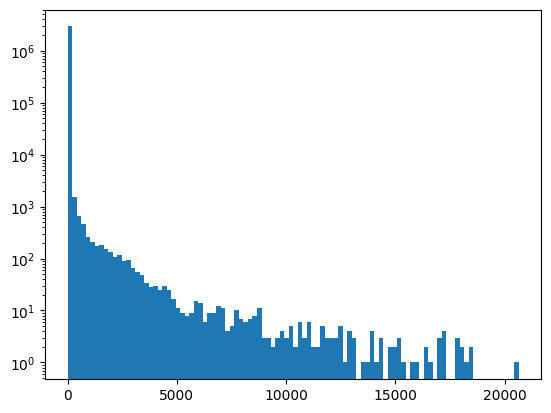

In [5]:
#histogram of data_array, removing the entries that are zero, in log scale
plt.hist(data_array[data_array>0],bins=100,log=True)

In [6]:
#open csv file in data/aml035_pre_transplant_analysis/analysis_csv/kmeans/10_clusters/clusters.csv
#and store the results in the clusters object
clusters = pd.read_csv('./data/aml035_pre_transplant/aml035_pre_transplant_analysis/analysis_csv/kmeans/10_clusters/clusters.csv')

In [7]:
clusters

,Barcode,Cluster
0,AAACGCACTGGTGT-1,2
1,AAAGCAGAATGGTC-1,7
2,AAAGCAGATCCCGT-1,8
3,AAATACTGGTGTAC-1,3
4,AAATCAACACCTTT-1,4
...,...,...
3587,TTTCGAACTATTCC-4,1
3588,TTTCGAACTTCCAT-4,2
3589,TTTCTACTAGGTCT-4,2
3590,TTTCTACTCGCATA-4,8


In [20]:
#open the differential_expression.csv file in path+'aml027_pre_transplant_analysis/analysis_csv/kmeans/10_clusters/differential_expression.csv
#and store the results in the diff_exp_pre object
diff_exp_pre = pd.read_csv(path+'aml027_pre_transplant_analysis/analysis_csv/kmeans/10_clusters/differential_expression.csv')
#do the same for the post transplant data
diff_exp_post = pd.read_csv(path+'aml027_post_transplant_analysis/analysis_csv/kmeans/10_clusters/differential_expression.csv')


In [21]:
diff_exp_pre

,Gene ID,Gene Name,Cluster 1 Weight,Cluster 1 UMI counts/cell,Cluster 2 Weight,Cluster 2 UMI counts/cell,Cluster 3 Weight,Cluster 3 UMI counts/cell,Cluster 4 Weight,Cluster 4 UMI counts/cell,...,Cluster 6 Weight,Cluster 6 UMI counts/cell,Cluster 7 Weight,Cluster 7 UMI counts/cell,Cluster 8 Weight,Cluster 8 UMI counts/cell,Cluster 9 Weight,Cluster 9 UMI counts/cell,Cluster 10 Weight,Cluster 10 UMI counts/cell
0,ENSG00000237683,AL627309.1,-4.926005,0.000000,-50.203281,0.000895,-0.571131,0.00,-3.962221,0.000000,...,-19.668324,0.000000,-2.855655,0.0000,96.571981,0.0100,-0.571131,0.0000,-4.247787,0.000000
1,ENSG00000228463,AP006222.2,-2.200758,0.000000,-35.626767,0.000000,-0.255160,0.00,60.951434,0.009009,...,-8.787085,0.000000,-1.275802,0.0000,-6.379009,0.0000,-0.255160,0.0000,-1.897755,0.000000
2,ENSG00000235373,RP11-206L10.3,-2.200758,0.000000,-35.626767,0.000000,-0.255160,0.00,60.951434,0.009009,...,-8.787085,0.000000,-1.275802,0.0000,-6.379009,0.0000,-0.255160,0.0000,-1.897755,0.000000
3,ENSG00000228327,RP11-206L10.2,-2.543704,0.000000,-41.178505,0.000000,-0.294922,0.00,8.642665,0.009009,...,51.650481,0.001815,-1.474611,0.0000,-7.373054,0.0000,-0.294922,0.0000,-2.193483,0.000000
4,ENSG00000237491,RP11-206L10.9,-4.281504,0.000000,-69.310716,0.000000,-0.496406,0.00,-3.443818,0.000000,...,40.004980,0.003630,-2.482031,0.0000,23.547742,0.0025,-0.496406,0.0000,-3.692021,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15700,ENSG00000215781,AC011043.1,-3.006353,0.000000,-48.668064,0.000000,-0.348563,0.00,51.916818,0.009009,...,-12.003627,0.000000,29.603278,0.0125,-8.714067,0.0000,-0.348563,0.0000,-2.592435,0.000000
15701,ENSG00000220023,AL592183.1,75.950164,0.101449,-230.832360,0.014772,14.752684,0.25,-6.412118,0.054054,...,-47.605575,0.023593,28.271017,0.2375,126.120262,0.0900,6.002268,0.0625,36.253284,0.134454
15702,ENSG00000212884,AC011841.1,-2.200758,0.000000,-35.626767,0.000000,-0.255160,0.00,-1.770175,0.000000,...,-8.787085,0.000000,-1.275802,0.0000,-6.379009,0.0000,-0.255160,0.0000,60.823854,0.008403
15703,ENSG00000215700,PNRC2,34.088484,0.050725,-256.930724,0.008057,-2.553011,0.00,8.513512,0.090090,...,140.744030,0.076225,28.809433,0.2125,-43.287618,0.0075,5.617567,0.0625,21.354563,0.058824


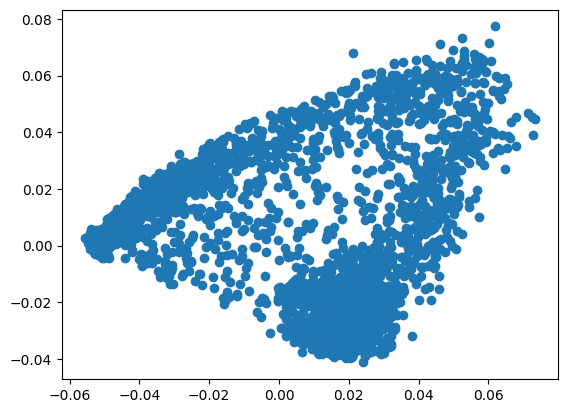

In [10]:
#look at the pca file as well, in data/aml035_pre_transplant_analysis/analysis_csv/pca/components.csv'
pca_components = pd.read_csv('./data/aml035_pre_transplant/aml035_pre_transplant_analysis/analysis_csv/pca/components.csv')
pca_proj=pd.read_csv('./data/aml035_pre_transplant/aml035_pre_transplant_analysis/analysis_csv/pca/projection.csv')
#take columns PC-1 and PC-2 from pca_proj and plot them in a scatter plot
plt.scatter(pca_proj['PC-1'],pca_proj['PC-2'])

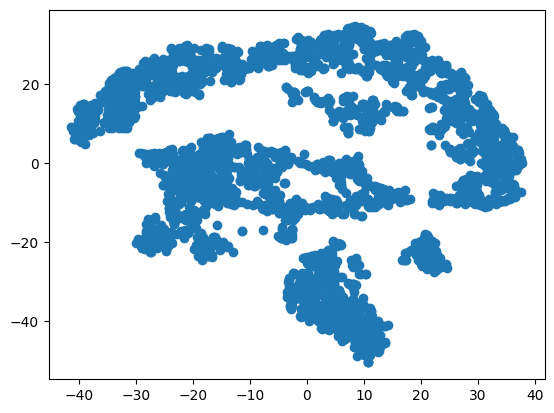

In [11]:
#also visualize the stuff in the './data/aml035_pre_transplant/aml035_pre_transplant_analysis/analysis_csv/tsne/projection.csv' file
tsne_proj=pd.read_csv('./data/aml035_pre_transplant/aml035_pre_transplant_analysis/analysis_csv/tsne/projection.csv')
#plot the two tsne components in a scatter plot
plt.scatter(tsne_proj['TSNE-1'],tsne_proj['TSNE-2'])

## Now instead check the data in cml2017
Link: https://www.ebi.ac.uk/gxa/sc/experiments/E-GEOD-76312/downloads

It contains 2120 cells, 29965 genes

In [2]:
#open data in '/data/cml_2017/E-GEOD-76312.clusters.tsv'
#and store the results in the cml_clusters object
cml_clusters = pd.read_csv('./data/cml_2017/E-GEOD-76312.clusters.tsv',sep='\t')
#open matrix in '/data/cml_2017/E-GEOD-76312-normalised-files/E-GEOD-76312.aggregated_filtered_normalised_counts.mtx'
#and store the results in the cml_matrix object
cml_matrix = sc.read_mtx('./data/cml_2017/E-GEOD-76312-normalised-files/E-GEOD-76312.aggregated_filtered_normalised_counts.mtx')
#read marker genes in '/data/cml_2017/E-GEOD-76312-marker-genes-files/E-GEOD-76312.marker_genes_10.tsv'
#and store the results in the cml_marker_genes object
cml_marker_genes = pd.read_csv('./data/cml_2017/E-GEOD-76312-marker-genes-files/E-GEOD-76312.marker_genes_10.tsv',sep='\t')


In [21]:
cml_log_matrix=sc.pp.log1p(cml_matrix, copy=True)
cml_matrix=cml_matrix.T
cml_log_matrix=cml_log_matrix.T


In [17]:
#choose the row K==6 in cml_clusters and take all the barcodes in that row
#and store the results in the cml_cluster_6 object
cml_cluster_6=cml_clusters[cml_clusters['K']==6]
#remove the first 2 columns from cml_cluster_6
cml_cluster_6=cml_cluster_6.iloc[:,2:]
#make it into a list
cml_cluster_6=list(cml_cluster_6.values.flatten())

cml_matrix.obs['clusters'] = cml_cluster_6  # Replace 'cluster_assignments' with your list




In [18]:
sc.pp.pca(cml_log_matrix, n_comps=100)  # Reducing the data to the 50 first principal components
sc.pp.neighbors(cml_log_matrix, n_neighbors=10, n_pcs=100)  # Computing neighborhood graph
sc.tl.umap(cml_log_matrix)  # Computing UMAP


/home/federico/anaconda3/envs/bioenv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


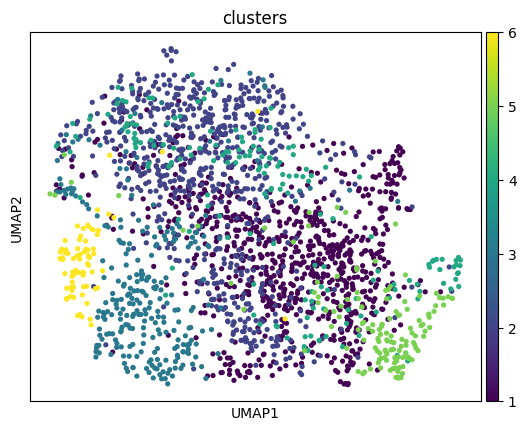

In [19]:
sc.pl.umap(cml_matrix,color='clusters')

## Data in AML027

Data available on 10xgenomics: 

https://www.10xgenomics.com/resources/datasets/aml-027-pre-transplant-bmm-cs-1-standard-1-1-0

https://www.10xgenomics.com/resources/datasets/aml-027-post-transplant-bmm-cs-1-standard-1-1-0

In [11]:
path='./data/aml027/'

In [59]:
#use scanpy to open the pre and post transplant matrices
matrix_pre = sc.read_10x_mtx(
    path+'/aml027_pre_transplant_filtered_gene_bc_matrices/filtered_matrices_mex/hg19')
matrix_post = sc.read_10x_mtx(
    path+'/aml027_post_transplant_filtered_gene_bc_matrices/filtered_matrices_mex/hg19')
#print the barcodes of the pre and post transplant matrices
print(matrix_pre.obs_names)
print(matrix_post.obs_names)

Index(['AAACATACAGTACC-1', 'AAACATACCATTCT-1', 'AAACATACTCGCAA-1',
       'AAACCGTGGCCATA-1', 'AAACCGTGTCGTGA-1', 'AAACGCACCTTATC-1',
       'AAACGCACGCAGTT-1', 'AAACGCACTCCTCG-1', 'AAACGCACTCGCCT-1',
       'AAACGCTGCGCCTT-1',
       ...
       'TTTCCAGAATGGTC-1', 'TTTCCAGAGGGATG-1', 'TTTCGAACAGCTAC-1',
       'TTTCGAACGACGTT-1', 'TTTCGAACTACAGC-1', 'TTTCGAACTCTAGG-1',
       'TTTCTACTAGAACA-1', 'TTTGACTGGACAGG-1', 'TTTGCATGAAGTAG-1',
       'TTTGCATGGAATGA-1'],
      dtype='object', length=3933)
Index(['AAACATTGACGGAG-1', 'AAACATTGGGAGTG-1', 'AAACATTGTAGCGT-1',
       'AAACCGTGCTTCTA-1', 'AAACGCACGCTGTA-1', 'AAACGCACGCTTCC-1',
       'AAACGGCTCATCAG-1', 'AAAGAGACTGCCTC-1', 'AAAGATCTGGGATG-1',
       'AAAGCAGACACAAC-1',
       ...
       'TTTCACGAGGGCAA-2', 'TTTCAGTGCTCGAA-2', 'TTTCAGTGGACGAG-2',
       'TTTCAGTGGGGAGT-2', 'TTTCCAGACCAATG-2', 'TTTCCAGAGTACCA-2',
       'TTTCCAGATGGTCA-2', 'TTTCGAACGACGAG-2', 'TTTCTACTCGTGTA-2',
       'TTTGCATGAGCATC-2'],
      dtype='object', length=

In [40]:
#open csv file in path+'aml027_pre_transplant_analysis/analysis_csv/kmeans/10_clusters/clusters.csv
#and store the results in the clusters_pre object
clusters_pre = pd.read_csv(path+'/aml027_pre_transplant_analysis/analysis_csv/kmeans/10_clusters/clusters.csv')
#do the same for the post transplant clusters
clusters_post = pd.read_csv(path+'/aml027_post_transplant_analysis/analysis_csv/kmeans/10_clusters/clusters.csv')

In [48]:
#preprocess the pre-transplant data
matrix_pre_pro=sc.pp.normalize_total(matrix_pre, target_sum=1e4,copy=True)
sc.pp.log1p(matrix_pre_pro)
#same for post-transplant data
matrix_post_pro=sc.pp.normalize_total(matrix_post, target_sum=1e4,copy=True)
sc.pp.log1p(matrix_post_pro)


In [49]:
var_genes_pre=sc.pp.highly_variable_genes(
    matrix_pre_pro, n_top_genes=4000, flavor="seurat_v3", subset=False,inplace=False
)
var_genes_post=sc.pp.highly_variable_genes(
    matrix_post_pro, n_top_genes=4000, flavor="seurat_v3", subset=False,inplace=False
)

/home/federico/anaconda3/envs/bioenv/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/home/federico/anaconda3/envs/bioenv/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [50]:
#in var_genes, select only those for which the gene is highly variable
var_genes_pre=var_genes_pre[var_genes_pre['highly_variable']==True]
var_genes_post=var_genes_post[var_genes_post['highly_variable']==True]

In [47]:
#take the 'Cluster' column of clusters_pre and make it a list
clusters_pre_list=list(clusters_pre['Cluster'])
matrix_pre_pro.obs['clusters'] = clusters_pre_list  # Replace 'cluster_assignments' with your list
#do the same for the post transplant data
clusters_post_list=list(clusters_post['Cluster'])
matrix_post.obs['clusters'] = clusters_post_list  # Replace 'cluster_assignments' with your list

/home/federico/anaconda3/envs/bioenv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


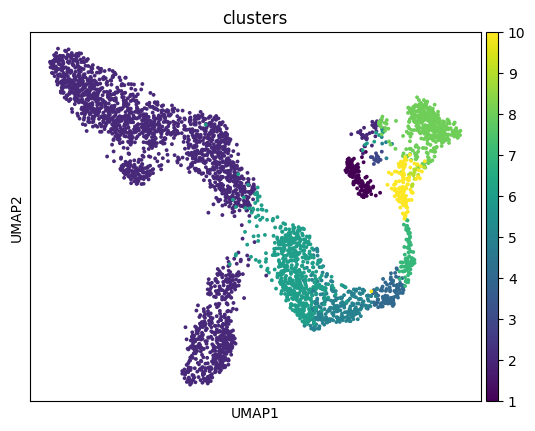

In [57]:
#umap for the pre-transplant data
sc.pp.pca(matrix_pre_pro, n_comps=100)  # Reducing the data to the 50 first principal components
sc.pp.neighbors(matrix_pre_pro, n_neighbors=100, n_pcs=100)  # Computing neighborhood graph
sc.tl.umap(matrix_pre_pro)  # Computing UMAP
sc.pl.umap(matrix_pre_pro,color='clusters')

/home/federico/anaconda3/envs/bioenv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


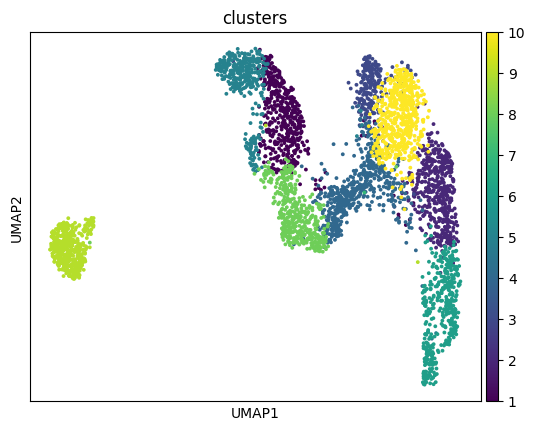

In [58]:
#umap for the post-transplant data
sc.pp.pca(matrix_post_pro, n_comps=100)  # Reducing the data to the 50 first principal components
sc.pp.neighbors(matrix_post_pro, n_neighbors=100, n_pcs=100)  # Computing neighborhood graph
sc.tl.umap(matrix_post_pro)  # Computing UMAP
sc.pl.umap(matrix_post_pro,color='clusters')


In [ ]:
#open the differential_expression.csv file in path+'aml027_pre_transplant_analysis/analysis_csv/kmeans/10_clusters/differential_expression.csv
#and store the results in the diff_exp_pre object
diff_exp_pre = pd.read_csv(path+'aml027_pre_transplant_analysis/analysis_csv/kmeans/10_clusters/differential_expression.csv')
#do the same for the post transplant data
diff_exp_post = pd.read_csv(path+'aml027_post_transplant_analysis/analysis_csv/kmeans/10_clusters/differential_expression.csv')


In [60]:
#open path+'aml027_post_transplant_metrics_summary.csv' and store the results in the metrics_post object
metrics_post = pd.read_csv(path+'aml027_post_transplant_metrics_summary.csv')
#do the same for the pre transplant data
metrics_pre = pd.read_csv(path+'aml027_pre_transplant_metrics_summary.csv')

In [61]:
metrics_post


,Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Reads Mapped Confidently to Transcriptome,Reads Mapped Confidently to Exonic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Intergenic Regions,cDNA PCR Duplication,Q30 Bases in Barcode,Q30 Bases in Read 1,Q30 Bases in Sample Index,Q30 Bases in UMI,Fraction Reads in Cells,Median UMI Counts per Cell
0,"3,965","51,136",785,"202,755,142",92.6%,65.7%,68.7%,10.0%,2.9%,83.9%,77.4%,83.6%,89.1%,80.5%,81.6%,"3,010"


In [62]:
metrics_pre

,Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Reads Mapped Confidently to Transcriptome,Reads Mapped Confidently to Exonic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Intergenic Regions,cDNA PCR Duplication,Q30 Bases in Barcode,Q30 Bases in Read 1,Q30 Bases in Sample Index,Q30 Bases in UMI,Fraction Reads in Cells,Median UMI Counts per Cell
0,"3,933","58,491",369,"230,048,017",92.3%,73.1%,74.5%,3.3%,1.5%,83.6%,77.5%,82.3%,90.0%,80.3%,93.4%,"4,887"
